/Users/pratibhajangra/opt/anaconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


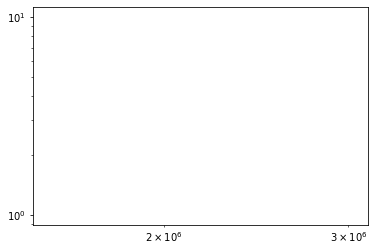

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
import math



π=np.pi
G=4.4908e-15            #in units of M☉^-1 pc^3 yr^-2
ρ_eq=3.1811e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t_eq=5.0506e4           #in units of yr for t_eq = 1.59246e12 seconds
t_i=(13.78e9)            #in units of yr
c=3.07e-10              #in units of Gpc yr^-1

M_1PBH=1000             #in units of M☉  
M_2PBH=100             #in units of M☉

x=np.linspace(40,50,100)        #in units of pc



λ_list=np.zeros(len(x))

def λ_0(M_1PBH,M_2PBH,x): #λ_0 for the PBH binary
     return ((8*π*ρ_eq*(x**3))/(3*(M_1PBH+M_2PBH)))

for k, x in enumerate (x):
     λ_list[k]=λ_0(M_1PBH,M_2PBH,x) 

        




def h(s):
    return math.sqrt((s**-3)+(s**-4))   
def g(s):
    return  -((3*s+4)/(2*h(s)*(s**5))) #g(x)=h'(x).
    
    
def s_dec(λ_0):  #Function to calculate the s_decouple of the PBH binary
    def f(u,s,λ_0):
            return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    #eq.(1) in reference pdf "M_DM at s_dec".
    separation0= [1e-12,1]
    b= (3*λ_0)/100000
    ss= np.linspace(1e-12,((6*λ_0)/3),100000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        s=(As[i]*λ_0)              #s/λ at which the binary decouples.
        A=Bs[i] 
        if Δ<0:
            break
    return s


def a(λ_0):   #Function to calculate the initial semi-major axis of the PBH binary
    def f(u,s,λ_0):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ_0
                     *((u[0]**2+b**2)**(3/2))))]    
    separation0= [1e-12,1]
    b=(3*λ_0)/100000
    ss= np.linspace(1e-12,(2*λ_0),1000000) 
    us= odeint(f,separation0,ss,args=( λ_0,))
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_list = Bs.tolist()
    As_list = As.tolist()
    for i in  range(1,len(Bs_list)):
        Δ=(Bs[i] - Bs[i-1])
        A=Bs[i]
        a=((A/2)*λ_0)                   #as Bs=separations/λ_0.
        if Δ<0:
            break
    
    return a

s_dec_list=np.zeros(len(λ_list))
a_i_list=np.zeros(len(λ_list))


for j, λ_0 in enumerate (λ_list):
    s_dec_list[j]=s_dec(λ_0)
    a_i_list[j]=a(λ_0)




def t_dec(s_dec):  #time of the binary decouple
    return (((3/(8*π*G*ρ_eq))**(1/4))*(((2/3)*(s_dec-2)*((s_dec+1)**(1/2))+(4/3))**(1/2)))

def r_ta(M_PBH,s_dec): #r_turnaround of the dark matter halos
    return ((4*G*M_PBH*t_dec(s_dec))**(1/3))

r_1_ta_list=np.zeros(len(λ_list))
r_2_ta_list=np.zeros(len(λ_list))

for j, s_dec in enumerate (s_dec_list):
    r_1_ta_list[j]=r_ta(M_1PBH,s_dec)
    r_2_ta_list[j]=r_ta(M_2PBH,s_dec)
    
    



def ρ_bar(M_PBH):
    return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*M_PBH)**(3/4))) 
        
def M_DM(M_PBH,r_ta): #Mass of the dark matter halos
    return ((16/3)*π*ρ_bar(M_PBH)*((r_ta)**(3/4)))

M_1_DM_list=np.zeros(len(λ_list))
M_2_DM_list=np.zeros(len(λ_list))

for i, r_ta in enumerate (r_1_ta_list):
    M_1_DM_list[i]=M_DM(M_1PBH,r_ta)
    
for i, r_ta in enumerate (r_2_ta_list):
    M_2_DM_list[i]=M_DM(M_2PBH,r_ta)
    



def M_1(M_1PBH):
    return (M_1PBH+M_DM)
            
def M_2(M_2PBH):
    return (M_2PBH+M_DM) 

M_1_list=np.zeros(len(λ_list))
M_2_list=np.zeros(len(λ_list))

for i, M_DM in enumerate (M_1_DM_list):
    M_1_list[i]=M_1(M_1PBH)
    
for i, M_DM in enumerate (M_2_DM_list):
    M_2_list[i]=M_2(M_2PBH)  
    



def j_i(M_1,M_2,a_i):
    return ((((85/3)*(G**3)*M_1*M_2*(M_1+M_2)*t_i)/((a_i**(4))*(c**(5))))**(1/7))

j_i_list=np.zeros(len(M_1_list))

for k, (M_1,M_2,a_i) in enumerate (zip(M_1_list,M_2_list,a_i_list)):
    j_i_list[k]=j_i(M_1,M_2,a_i)
    

            

    
def e_i(j_i):
    return ((1-(j_i**2))**(1/2))

e_i_list=np.zeros(len(j_i_list))

for k, j_i in enumerate(j_i_list):
    e_i_list[k]=e_i(j_i)
    







def r_min(e_i,a_i): #r_min of the PBH binary orbit
    return (a_i*(1-e_i)) 

r_min_list=np.zeros(len(a_i_list))
for k, (e_i,a_i) in enumerate (zip(e_i_list,a_i_list)):
     r_min_list[k]=r_min(e_i,a_i)




def E_1(M_PBH,r_min):
    return (16*π*G*ρ_bar(M_PBH)*M_PBH*((r_min/2)**(-1/4)))

def E_2(M_PBH,r_ta,r_min):
    return  (((128/3)*G*(π**2)*(ρ_bar(M_PBH)**2))*((3*r_ta**(1/2))-((r_min/2)**(1/2))))

def E_b(E_1,E_2):#Binding  energy of the dark matter halo
    return (-(E_1+E_2))


E_1_1PBH_list=np.zeros(len(r_min_list))
E_2_1PBH_list=np.zeros(len(r_min_list))
E_1_2PBH_list=np.zeros(len(r_min_list))
E_2_2PBH_list=np.zeros(len(r_min_list))

for i, r_min in enumerate (r_min_list):
    E_1_1PBH_list[i] = E_1(M_1PBH,r_min)
    E_1_2PBH_list[i] = E_1(M_2PBH,r_min)
    



for i, (r_ta,r_min) in enumerate (zip(r_1_ta_list,r_min_list)):
    E_2_1PBH_list[i] = E_2(M_1PBH,r_ta,r_min)
for i, (r_ta,r_min) in enumerate (zip(r_2_ta_list,r_min_list)):    
    E_2_2PBH_list[i] = E_2(M_2PBH,r_ta,r_min)
   
    

E_b_1PBH_list=np.zeros(len(r_min_list))
E_b_2PBH_list=np.zeros(len(r_min_list))

for i, (E_1,E_2) in enumerate (zip(E_1_1PBH_list,E_2_1PBH_list)):
    E_b_1PBH_list[i]=E_b(E_1,E_2)
    
for i, (E_1,E_2) in enumerate (zip(E_1_2PBH_list,E_2_2PBH_list)):
    E_b_2PBH_list[i]=E_b(E_1,E_2)
    





def a_f(a_i,M_1PBH,M_2PBH): #Final semi-major axis
    return ((G*M_1PBH*M_2PBH*a_i)/((G*M_1*M_2)-(2*a_i*(E_b_1+E_b_2))))


a_f_list=np.zeros(len(r_min_list))

for i, (a_i,M_1,M_2,E_b_1,E_b_2) in enumerate (zip(a_i_list,M_1_list,M_2_list,E_b_1PBH_list,E_b_2PBH_list)):
    a_f_list[i]=a_f(a_i,M_1PBH,M_2PBH)
    


plt.loglog(a_i_list,a_f_list,'r')
plt.show()

